## Code For Gradient Descent method

First function:
    $$ f(x,y) = 2x^2 + \frac{3}{2}y^2 + xy - x - 2y + 7.9 $$
        

### How it works

The gradient descent minimizes a function $f(x)$ (where x may represent more than one variable) by taking a series of steps down the negative gradient at each point in the step. In our examples, we will be minimizing functions of two variables $f(x,y)$. The algorithm for this method is as follows:

![Image of 1-D Gradient Descent](https://cdn-images-1.medium.com/max/1600/1*UUHvSixG7rX2EfNFTtqBDA.gif)

- 1 Initialize a starting point $(x_o, y_o)$

Our starting point will be random, and thus we define an initialization function that uses numpy's random number generator to generate an initial $(x_o, y_o)$ point along the paraboloid.

- 2 Iteratively find the negative gradient at the point.

We define a gradient function which will return the derivatives of the function (with respect to x and y). The gradient will tell us the direction in which we want to search for points as we minimize the function.

- 3 Initialize the step size $\gamma$

Our first step along the gradient descent calculated from step 2 is chosen to be small (0.01, for example). 

- 4 Calculate the point that minimizes the function in the gradient descent direction

This is done by the following relation: $$x_n+1 = x_n - \gamma * \nabla f(x)$$ - note that in this case, x is a vector containing the x and y coordinates.

- 5 Include variable step size

In order to decrease the number of steps taken to convergence, $\gamma$ becomes a variable step size for each successive iteration of the algorithm. The variable step size is calculated via line search according to the following relation:

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

Where again, x represents the vector containing the x and y coordinates calculated from the previous iteration. The above criterion for the size of the step is known as the Barzilai-Borwein method.

- 6 Repeat algorithm until convergence criterion is met

We repeat the algorithm until our convergence criterion is met - until our minimization gives a value within 0.001 to the true minimum, for example.





Below, we do a couple of examples to illustrate the functionality of the gradient descent algorithm. First, we plot the function in 3D, and then implement the algorithm to show its convergence to the function's minimum on a contour map of the function.

In [20]:
# %matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D                      

def f3(x):
    
    """
    Some function with one local minimum
    """
    
    return x[0]**2/8 + 3*x[1]**2/11 -x[0]*x[1]/7

def f(x):
    
    """
    Function dependent on x and y
    """
        
    return 2*x[0]**2 + 3/2 * x[1]**2 + x[0]*x[1] - x[0] - 2*x[1] + 7.9

def f2(x):
    
    """
    Some function with two close local minima
    """
    
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)


def get_plot(x_min, x_max,y_min, y_max, func,cache,step):
    
    """
    Function to plot the 3D plot of function + the contour plot 
    """
    
    xs = np.linspace(x_min,x_max,500)
    ys = np.linspace(y_min,y_max,500)
    XS,YS = np.meshgrid(xs,ys)
    ZS = func([XS,YS])

    # plot 3D
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection = '3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y)')
    ax.contour3D(XS,YS,ZS,200)
    ax.view_init(ax.elev, ax.azim-40)
    plt.show()

    # plot contour
    fig = plt.figure(figsize=(10,10))
    levels = np.arange(np.min(ZS), np.max(ZS), step)
    plt.contour(XS,YS,ZS, levels=levels,cmap = 'twilight')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # plot calculated steps
    cache = np.array(cache)
    plt.plot(cache[:,0],cache[:,1],'ro-')
    plt.show()

def derivative(f, x0, gamma=0.001):
    # numerical derivative of function
    x, y = x0[0], x0[1]
    fx = (f([(x+gamma), y]) -f([x, y]))/gamma
    fy = (f([x, (y+gamma)])-f([x, y]))/gamma
    der = np.array([fx, fy])
    return der

def gd(f, x0, N=1000):
    
    """
    Gradient descent algorithm
    
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    
    for i in range(N):
        
        df_now = derivative(f, x_now)
        
        if x_prev is None: # initialize step size for first iteration
            gamma = 0.001 
        else: # use eqn (?) to update gamma iteratively 
            df_prev = derivative(f, x_prev)
            gamma = np.dot(x_now-x_prev, df_now-df_prev) / np.linalg.norm(df_now-df_prev)**2
        x_next = x_now - gamma*df_now
        
        if abs(f(x_next)-f(x_now)) < 1e-4:
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)
            
    return converged, np.array(x_hist), f(x_now)

def init(x_min, x_max, y_min, y_max):
    
    """
    Initialize starting position
    """
    
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]


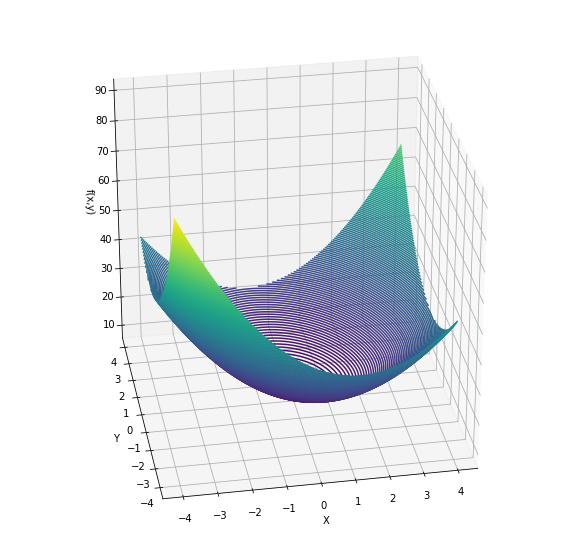

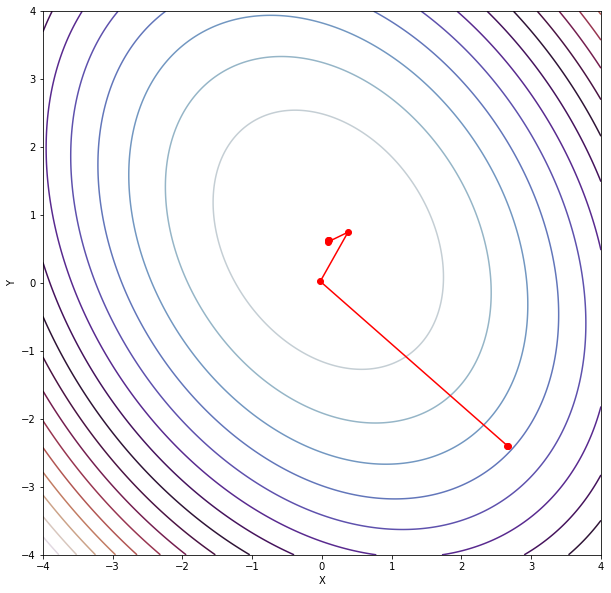

In [21]:
x_min, x_max, y_min, y_max = -4, 4, -4, 4
x0 = init(x_min, x_max, y_min, y_max)

converged, x_hist, f_min = gd(f, x0)
get_plot(x_min, x_max, y_min, y_max, f, x_hist,5)

### What about when there are two minimums in close proximity?

Gradient descent is good at minimizing a function with only one minimum, as we have seen. Furthermore, the function should ideally have a quadratic behavior around the minimum; higher-order functions where at least one variable is cubic or higher are more difficult to minimize using gradient descent. Furthermore, gradient descent typically fails when trying to find the minimum of a function with several minimums in close proximity (as we saw in lecture). Below we show an example of this. Depending on the starting position, GD may converge to either of the local minima, or it may converge to the saddle point in between. Thus, for global optimization GD is not suitable.

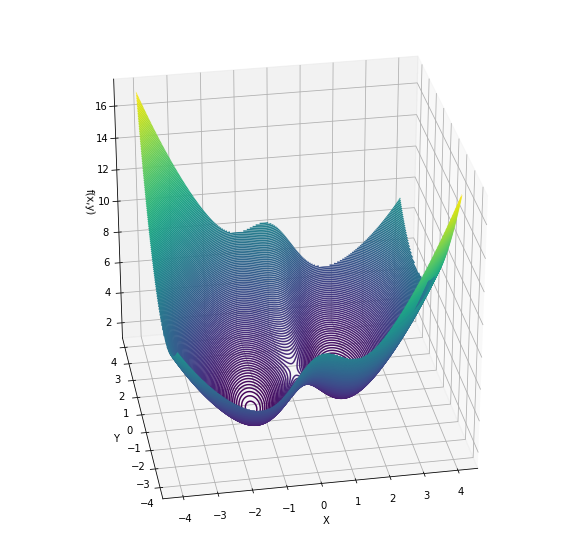

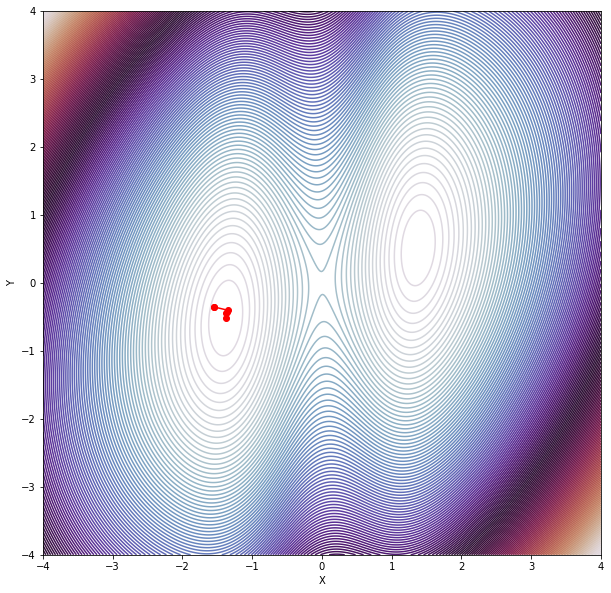

In [22]:
x_min, x_max, y_min, y_max = -4, 4, -4, 4
x0 = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = gd(f2, x0)
get_plot(x_min, x_max, y_min, y_max, f2, x_hist,0.1)

# Linear Conjugate Gradient Descent

The Conjugate Gradient Method is the most prominent iterative method for solving sparse systems of linear equations.

Effective for systems of the form $Ax=b$ where $x$ is an unknown vector, $b$ is a known vector, and $A$ is a known, square, symmetric, positive-definite matrix. 

Recall, from linear algebra, that $Ax=b$ written out fully is 

$$\left[\begin{array}
{rrr}
A_{11} & A_{12} & ... & A_{1n} \\
A_{21} & A_{22} &     & A_{2n} \\
\vdots &        & \ddots & \vdots \\
A_{n1} & A_{n2} & ... & A_{nn}
\end{array}\right]
\left[\begin{array}
{rrr}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{array}\right] 
=
\left[\begin{array}
{rrr}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{array}\right]
$$

Limitations to the linear conjugate gradient descent arise from the requirement of positive-definiteness of A,

$$x^TAx > 0$$

TODO: EXAMPLE OF NEGATIVE-DEFINITNESS

Linear conj. gradient descent starts out by defining some quadratic function of a vector with the following form:

$$f(x)=\frac{1}{2}x^TAx-b^Tx+c$$

We look for solutions x that satisfy the system of linear equations Ax=b. These values of x minimize the quadratic function f(x) since 

$$\nabla f(x) = Ax + B $$.

where A is a matrix, x and b are vectors, and c is a scalar constant.

For example, from

$$ A =  \left[\begin{array}
{rrr}
4 & 1 \\
1 & 3
\end{array}\right],
b = \left[\begin{array}
{rrr}
1 \\
2
\end{array}\right],
c = 7.9
$$

we obtain the following function:

$$
\frac{1}{2}x^TAx-b^Tx+c = 
$$
$$
\frac{1}{2} \left[\begin{array} {rrr}x & y \\ \end{array}\right] A \left[\begin{array} {rrr}x \\ y \end{array}\right] - \left[\begin{array} {rrr}1 & 2 \\ \end{array}\right] \left[\begin{array} {rrr}x \\ y \end{array}\right] + 7.9 
$$

$$
= \frac{1}{2}(4x^2+3y^2+2xy) - (x+2y)+7.9
$$

$$
= 2x^2 + \frac{3}{2}y^2 + xy - x - 2y + 7.9
$$

and look for solutions x that satisfy the system of linear equations Ax=b.

## L-CG Algorithm

Below we discuss the algorithm behind minimizing these types of quadratic functions by solving a system of linear equations.

- 1 Generate initial starting point $(x_o, y_o)$

Use numpy's random number generator to generate starting position $(x_o, y_o)$.

- 2 Find initial search direction from: 

$$d_o = r_o = b - Ax_o$$,

where b and A are our defined vector and matrix, $d_o$ is the *search direction*, and $r_o$ is the *residual*, or more importantly, the direction of descent. In the first iteration, we see that $d_o$ and $r_o$ are equal.

- 3 Determine the scalar constant *a* (this is essentially out step size)

We want to know how far along our search direction $d_i$ we need to go: this is determined by out step size *a*, and we can calculate it from our residuals and search directions from the current iteration.

$$a = \frac{r_i^Tr_i}{d_i^TAd_i}$$

Since our residuals tell us how far away we are from the optimum position along each search direction, calculating the step size from the residuals will ensure that our next step is of suitable size.

- 4 Find next point along the search direction:

$$x_{i+1} = x_i + a_id_i$$

- 5 Find next residual (direction of steepest descent/magnitude away from minimization)

$$r_{i+1} = r_i - a_iAd_i$$

- 6 Determine scalar constant $B$

$$B_{i+1} = \frac{r_{i+1}^Tr_{i+1}}{r_i^tr_i}$$

This constant is based off of the residuals and is used in finding the next search direction.

- 7 Find next search direction

$$d_{i+1} = r_{i+1} - B_{i+1}d_i$$

Thus, each successive search direction is calculated from the residuals and the previous search direction. We can say then, that the search directions are constructed by conjugation of the residuals. The residuals have the property that they are orthogonal to the previous search direction. That is, it can be shwon that $d_{i}^Tr_{j} = 0, i<j$. 

Finally, the algorithm iterates through steps 3-7 until the magnitude $||r_i||$ is less than the tolerance we specify. Since the residual $r_i$ represents the direction of steepest descent, the closer it is to zero, the closer we are to minimizing $f(x)$.


In [23]:
def f(x, A, b, c):
    
    return float(0.5 * x.T * A * x - b.T * x + c)

def func1(x):
    
    """
    Function dependent on x and y
    """
        
    return 2*x[0]**2 + 3/2 * x[1]**2 + x[0]*x[1] - x[0] - 2*x[1] + 7.9

def cg(x0,f,A,b,c):
    
    """
    Linear conjugate gradient descent algorithm 
    """
    
    converge = False
    count = 0
    cache = []
    max_iter = 100
    
    while converge == False :
        
        r0 = b - A*x0

        if count == 0:
            p0 = r0
        else:
            p0 = p

        alpha = (r0.T * r0)/(r0.T * A * p0)
        alpha = np.array(alpha)[0][0]

        x = x0 + alpha * p0
        r = r0 - alpha * A * p0

        beta = (r.T * r)/(r0.T * r0)
        beta = np.array(beta)[0][0]

        p = r + beta * p0
                        
        diff = np.linalg.norm(x-x0)
        
        if np.linalg.norm(x-x0) < 1e-5:
            converge = True
            print("convergence successful")
            
        if count == max_iter:
            print("convergence failed")
            break
        
        cache.append(x0)

        x0 = x
        count +=1
    
    return cache

convergence successful


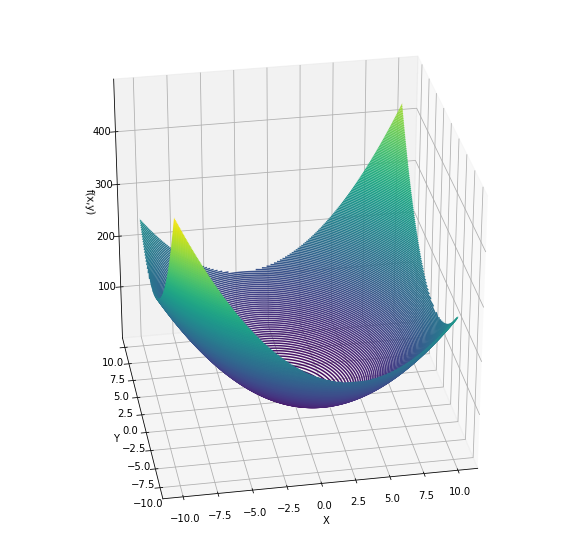

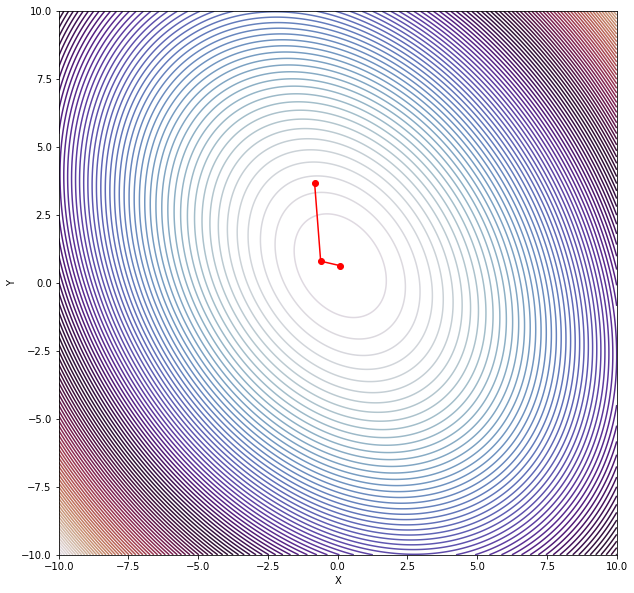

In [24]:
A = np.matrix([[4.0, 1.0], 
               [1.0, 3.0]])
b = np.matrix([[1.0], 
               [2.0]])  
c = 7.9

x_min, y_min = -10,-10
x_max, y_max = 10,10

x0 = np.array(init(x_min,x_max,y_min,y_max))
x0 = np.reshape(x0,(2,1))
cache = cg(x0,f,A,b,c)

get_plot(x_min,x_max,y_min,y_max,func1,cache,5)

## L-CG Limitations
    1. The algorithm doesn't work for any arbitrary A. Again, A must be positive definite and symmetric
    2. Works only for quadratic functions.

convergence successful


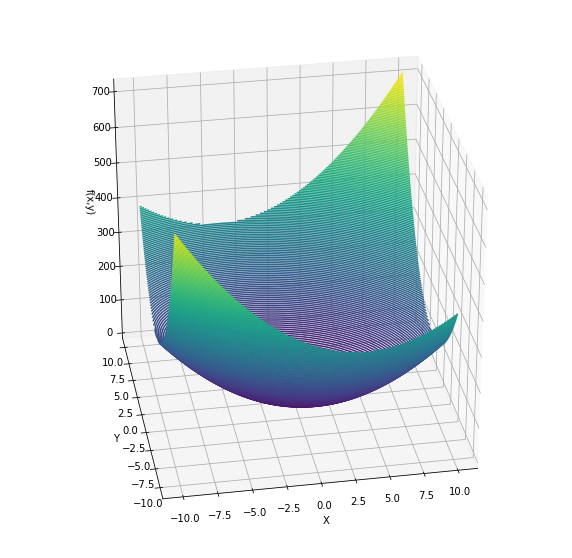

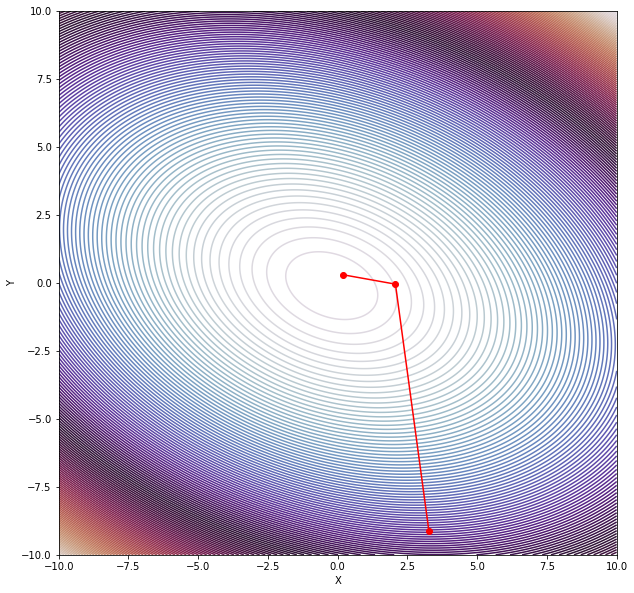

In [26]:
# assymetric A
A = np.matrix([[4.0, 1.0], 
               [1.0, 2.7]])
b = np.matrix([[1.0], 
               [1.0]])  
c = 7.9

def func1(x):
    return 2*x[0]**2 + 3/2 * x[0]*x[1] + 7/2 * x[1]**2 + x[0] + x[1]

x_min, y_min = -10,-10
x_max, y_max = 10,10

x0 = np.array(init(x_min,x_max,y_min,y_max))
x0 = np.reshape(x0,(2,1))
cache = cg(x0,f,A,b,c)

get_plot(x_min,x_max,y_min,y_max,func1,cache,5)


In [27]:
x0 = np.reshape(x0,(2,))
cache = gd(func1,x0)
cache

(True, array([[ 3.26860153, -9.12233501],
        [ 3.26820862, -9.06438507],
        [ 3.2027893 , -1.19299303],
        [ 1.55755294, -0.84498975],
        [-0.06025633, -0.14654727],
        [-0.2203236 , -0.11320731]]), -0.15417693713026615)

# Quasi-Newton Optimization

Optimization method used to either find zeroes or local maxima and minima of functions, as an alternative to Newton's method.

In general, Newton and Quasi-Newton optimization techniques over some function $f(x)$ follow the same basic algorithm:

1. Ensure the $f(x)$ is twice differentiable
2. As with all optimization algorithms, choose some initial guess of the coordinates (x) that minimize $f(x)$
3. Calculate the search direction, $$ p_k = -H_k \nabla f(x_k)$$  where H_k is the Hessian of f_k.
4. Based on the search direction, calculate the new predicted coordinates $$x_{k+1} = x_k + \alpha_k \nabla f(x_k)$$
    - Before calculating $x_{k+1}$, several $\alpha_k$ (the step size) must satisfy the Wolfe Conditions
5. Update H_k (This step is what divides Newton's method from several Quasi-Newton methods)
6. Repeat until converge.

For Newton Optimization, the Hessian $H_k$ is calculated iteratively then stored for later use. In Quasi-Newton methods, the Hessian is approximated and iteratively disposed. 

Some Quasi-Newton Methods are BFGS, L-BFGS, Broyden, etc, which all differ mainly in the approximation in $H_k$.

### Wolfe Conditions: 
- Conditions that ensure the step size $\alpha_k$ will lead to convergence of optimization algorithm.
- a value of $\alpha_k$ that minimized some function f(x_k) is called a global minimizer. To efficiently locate $alpha_k$, a line search that satisfies two confitions must be implemented. 
1. Sufficient decrease condition: $f(x_k + \alpha_k p_k) \leq f(x_k)+c_1 \alpha_k \nabla f(x_k)p_k$
    - $\alpha_k \nabla f(x_k)p_k$ is the decrease in f predicted by the slope of f at x_k in the direction of p_k (must be < 0)
    - c1 in range (0,1)
    - Condition one is invoked to prevent the minimzation scheme from doing the following: 
    
    ![Image of WC1](https://pages.mtu.edu/~msgocken/ma5630spring2003/lectures/lines/lines/img15.gif)
    
    Iterations repeatedly go from one side of a valley to the other, always reducing f but never by much. The problem is that the reduction in each step is very little compared to the length of the steps--the steps are too long.
    
2. Curvature condition: $\nabla f(x_k + \alpha_k p_k) \geq c_2 \nabla f(x_k)p_k$
- $c_2$ must be within 0 and 1 and must be less than $c_1$
- The curvature condition guarantees that $\alpha_k$ is large enough that the line search doesn't take steps that are too small. 
    
In a nut shell, the above Wolfe-Conditions prevent the algorithm from continually reducing f without reducing it enough to obtain convergence.
    
    

